# Exploratory Data Analysis <a id='Contents'></a>
* [Import Packages and Load Data](#Import_packages)
* [Descriptive Statistics](#Descriptive_statistics)
* [Visualization](#Visualization)
    * [Univariate Analysis](#Univariate_Analysis)
       * [Categorical Features](#Categorical)
       * [Numerical Features](#Numerical)
    * [Bivariate Analysis](#Heatmap)
       * [Heat Map](#Heatmap)
       * [Scatter Plots](#Scatter_plots)
* [Measure Relationship Strength](#Measure_Relationship_Strength)
    * [Categorical Features Relationships](#Categorical_Relationships)
    * [Numerical Features Relationships](#Numerical_Relationships)
* [EDA Summary](#EDA_Summary)
* [Conclusion](#Conclusion)

## Import Packages and Load Data  <a id = 'Import_packages'></a>

In [1]:
#Import Packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

In [2]:
#Load Data
dataset = pd.read_csv('Loan_default.csv')

dataset.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

LoanID 
Age
Income
LoanAmount
CreditScore
MonthsEmploye
NumCreditLine
InterestRate
LoanTerm
DTIRatio
Education
EmploymentTyp
MaritalStatus
HasMortgage
HasDependents
LoanPurpose
HasCoSigner
Default 


### Descriptive Statistics  <a id = 'Descriptive_statistics'></a>

In [4]:
dataset.describe().T

count           mean           std      min       25%  \
Age             255347.0      43.498306     14.990258     18.0     31.00   
Income          255347.0   82499.304597  38963.013729  15000.0  48825.50   
LoanAmount      255347.0  127578.865512  70840.706142   5000.0  66156.00   
CreditScore     255347.0     574.264346    158.903867    300.0    437.00   
MonthsEmployed  255347.0      59.541976     34.643376      0.0     30.00   
NumCreditLines  255347.0       2.501036      1.117018      1.0      2.00   
InterestRate    255347.0      13.492773      6.636443      2.0      7.77   
LoanTerm        255347.0      36.025894     16.969330     12.0     24.00   
DTIRatio        255347.0       0.500212      0.230917      0.1      0.30   
Default         255347.0       0.116128      0.320379      0.0      0.00   

                      50%        75%       max  
Age                 43.00      56.00      69.0  
Income           82466.00  116219.00  149999.0  
LoanAmount      127556.00  188985.00  249999.0  
CreditScore        574.00     712.00     849.0  
MonthsEmployed      60.00      90.00     119.0  
NumCreditLines       2.00       3.00       4.0  
InterestRate        13.46      19.25      25.0  
LoanTerm            36.00      48.00      60.0  
DTIRatio             0.50       0.70       0.9  
Default              0.00       0.00       1.0

In [5]:
categorical_features = ['Education', 'EmploymentType', 'LoanPurpose', 'MaritalStatus', 'HasMortgage', 'HasCoSigner']

In [6]:
for column in categorical_features:
    summary_stats = dataset[column].describe()
    print(f"Summary Statistics for {column}:\n{summary_stats}\n")
    print(" ")


Summary Statistics for Education:
count         255347
unique             4
top       Bachelor's
freq           64366
Name: Education, dtype: object

 
Summary Statistics for EmploymentType:
count        255347
unique            4
top       Part-time
freq          64161
Name: EmploymentType, dtype: object

 
Summary Statistics for LoanPurpose:
count       255347
unique           5
top       Business
freq         51298
Name: LoanPurpose, dtype: object

 
Summary Statistics for MaritalStatus:
count      255347
unique          3
top       Married
freq        85302
Name: MaritalStatus, dtype: object

 
Summary Statistics for HasMortgage:
count     255347
unique         2
top          Yes
freq      127677
Name: HasMortgage, dtype: object

 
Summary Statistics for HasCoSigner:
count     255347
unique         2
top          Yes
freq      127701
Name: HasCoSigner, dtype: object

 


**Convert categorical feature data types to Category Type**

Since the categorical feature columns represent categorical variables with a limited set of possible values, I choose to convert them to the categorical dtype. Also, I choose to drop the LoadID columns, as this is not relevant to the analysis.

In [7]:
dataset[categorical_features] = dataset[categorical_features].astype('category')

# Verify the changes
print(dataset.dtypes)


LoanID              object
Age                  int64
Income               int64
LoanAmount           int64
CreditScore          int64
MonthsEmployed       int64
NumCreditLines       int64
InterestRate       float64
LoanTerm             int64
DTIRatio           float64
Education         category
EmploymentType    category
MaritalStatus     category
HasMortgage       category
HasDependents       object
LoanPurpose       category
HasCoSigner       category
Default              int64
dtype: object


In [8]:
dataset = dataset.drop('LoanID', axis=1)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Age             255347 non-null  int64   
 1   Income          255347 non-null  int64   
 2   LoanAmount      255347 non-null  int64   
 3   CreditScore     255347 non-null  int64   
 4   MonthsEmployed  255347 non-null  int64   
 5   NumCreditLines  255347 non-null  int64   
 6   InterestRate    255347 non-null  float64 
 7   LoanTerm        255347 non-null  int64   
 8   DTIRatio        255347 non-null  float64 
 9   Education       255347 non-null  category
 10  EmploymentType  255347 non-null  category
 11  MaritalStatus   255347 non-null  category
 12  HasMortgage     255347 non-null  category
 13  HasDependents   255347 non-null  object  
 14  LoanPurpose     255347 non-null  category
 15  HasCoSigner     255347 non-null  category
 16  Default         255347 non-null  int64

## Visualization  <a id = 'Visualization'></a>

### Univariate Analysis  <a id = 'Univariate_Analysis'></a>

 #### Catregorical Features  <a id = 'Categorical'></a>

In [10]:
categorical_features = ['Education', 'EmploymentType', 'LoanPurpose', 'MaritalStatus', 'HasMortgage', 'HasCoSigner']

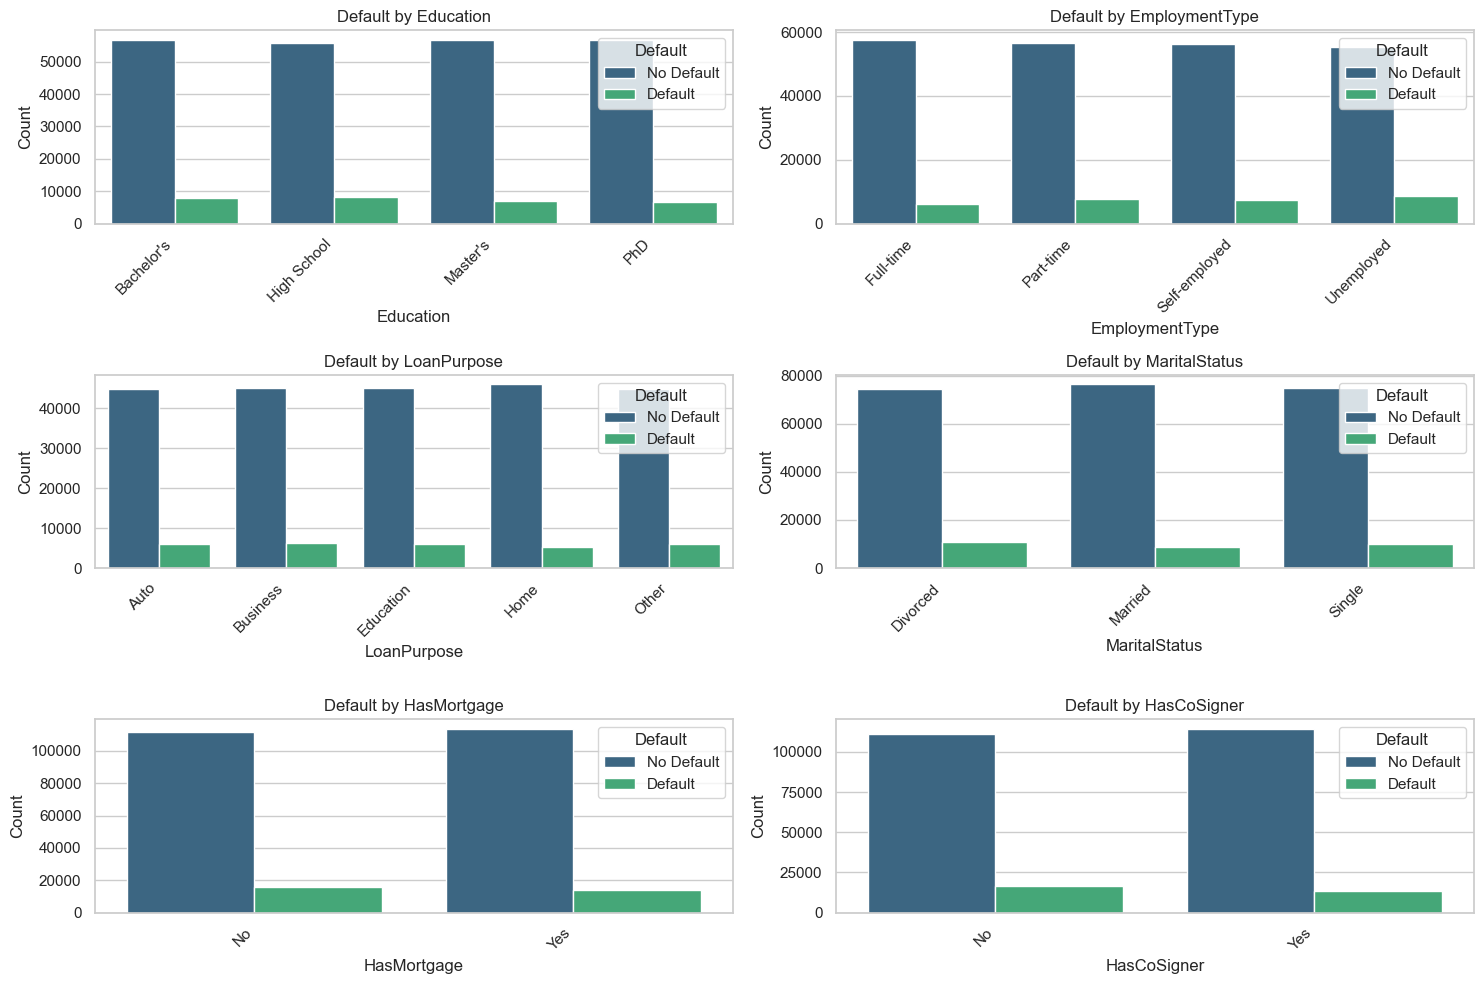

In [11]:
sns.set(style="whitegrid")  # Set style if needed
plt.figure(figsize=(15, 10))

# Create subplots for Education, EmploymentType, LoanPurpose, MaritalStatus, HasMortgage, and HasCoSigner
#categories = ['Education', 'EmploymentType', 'LoanPurpose', 'MaritalStatus', 'HasMortgage', 'HasCoSigner']

# Calculate the number of rows and columns needed for subplots
num_rows = (len(categorical_features) + 1) // 2  # Ensure an even number of rows for better layout
num_cols = 2

for i, category in enumerate(categorical_features, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=dataset, x=category, hue='Default', palette='viridis')
    plt.title(f'Default by {category}')
    plt.xlabel(category)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend(title='Default', labels=['No Default', 'Default'])

plt.tight_layout()
plt.show()

 #### Numerical Features  <a id = 'Numerical'></a>

In [12]:
Numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio' ]

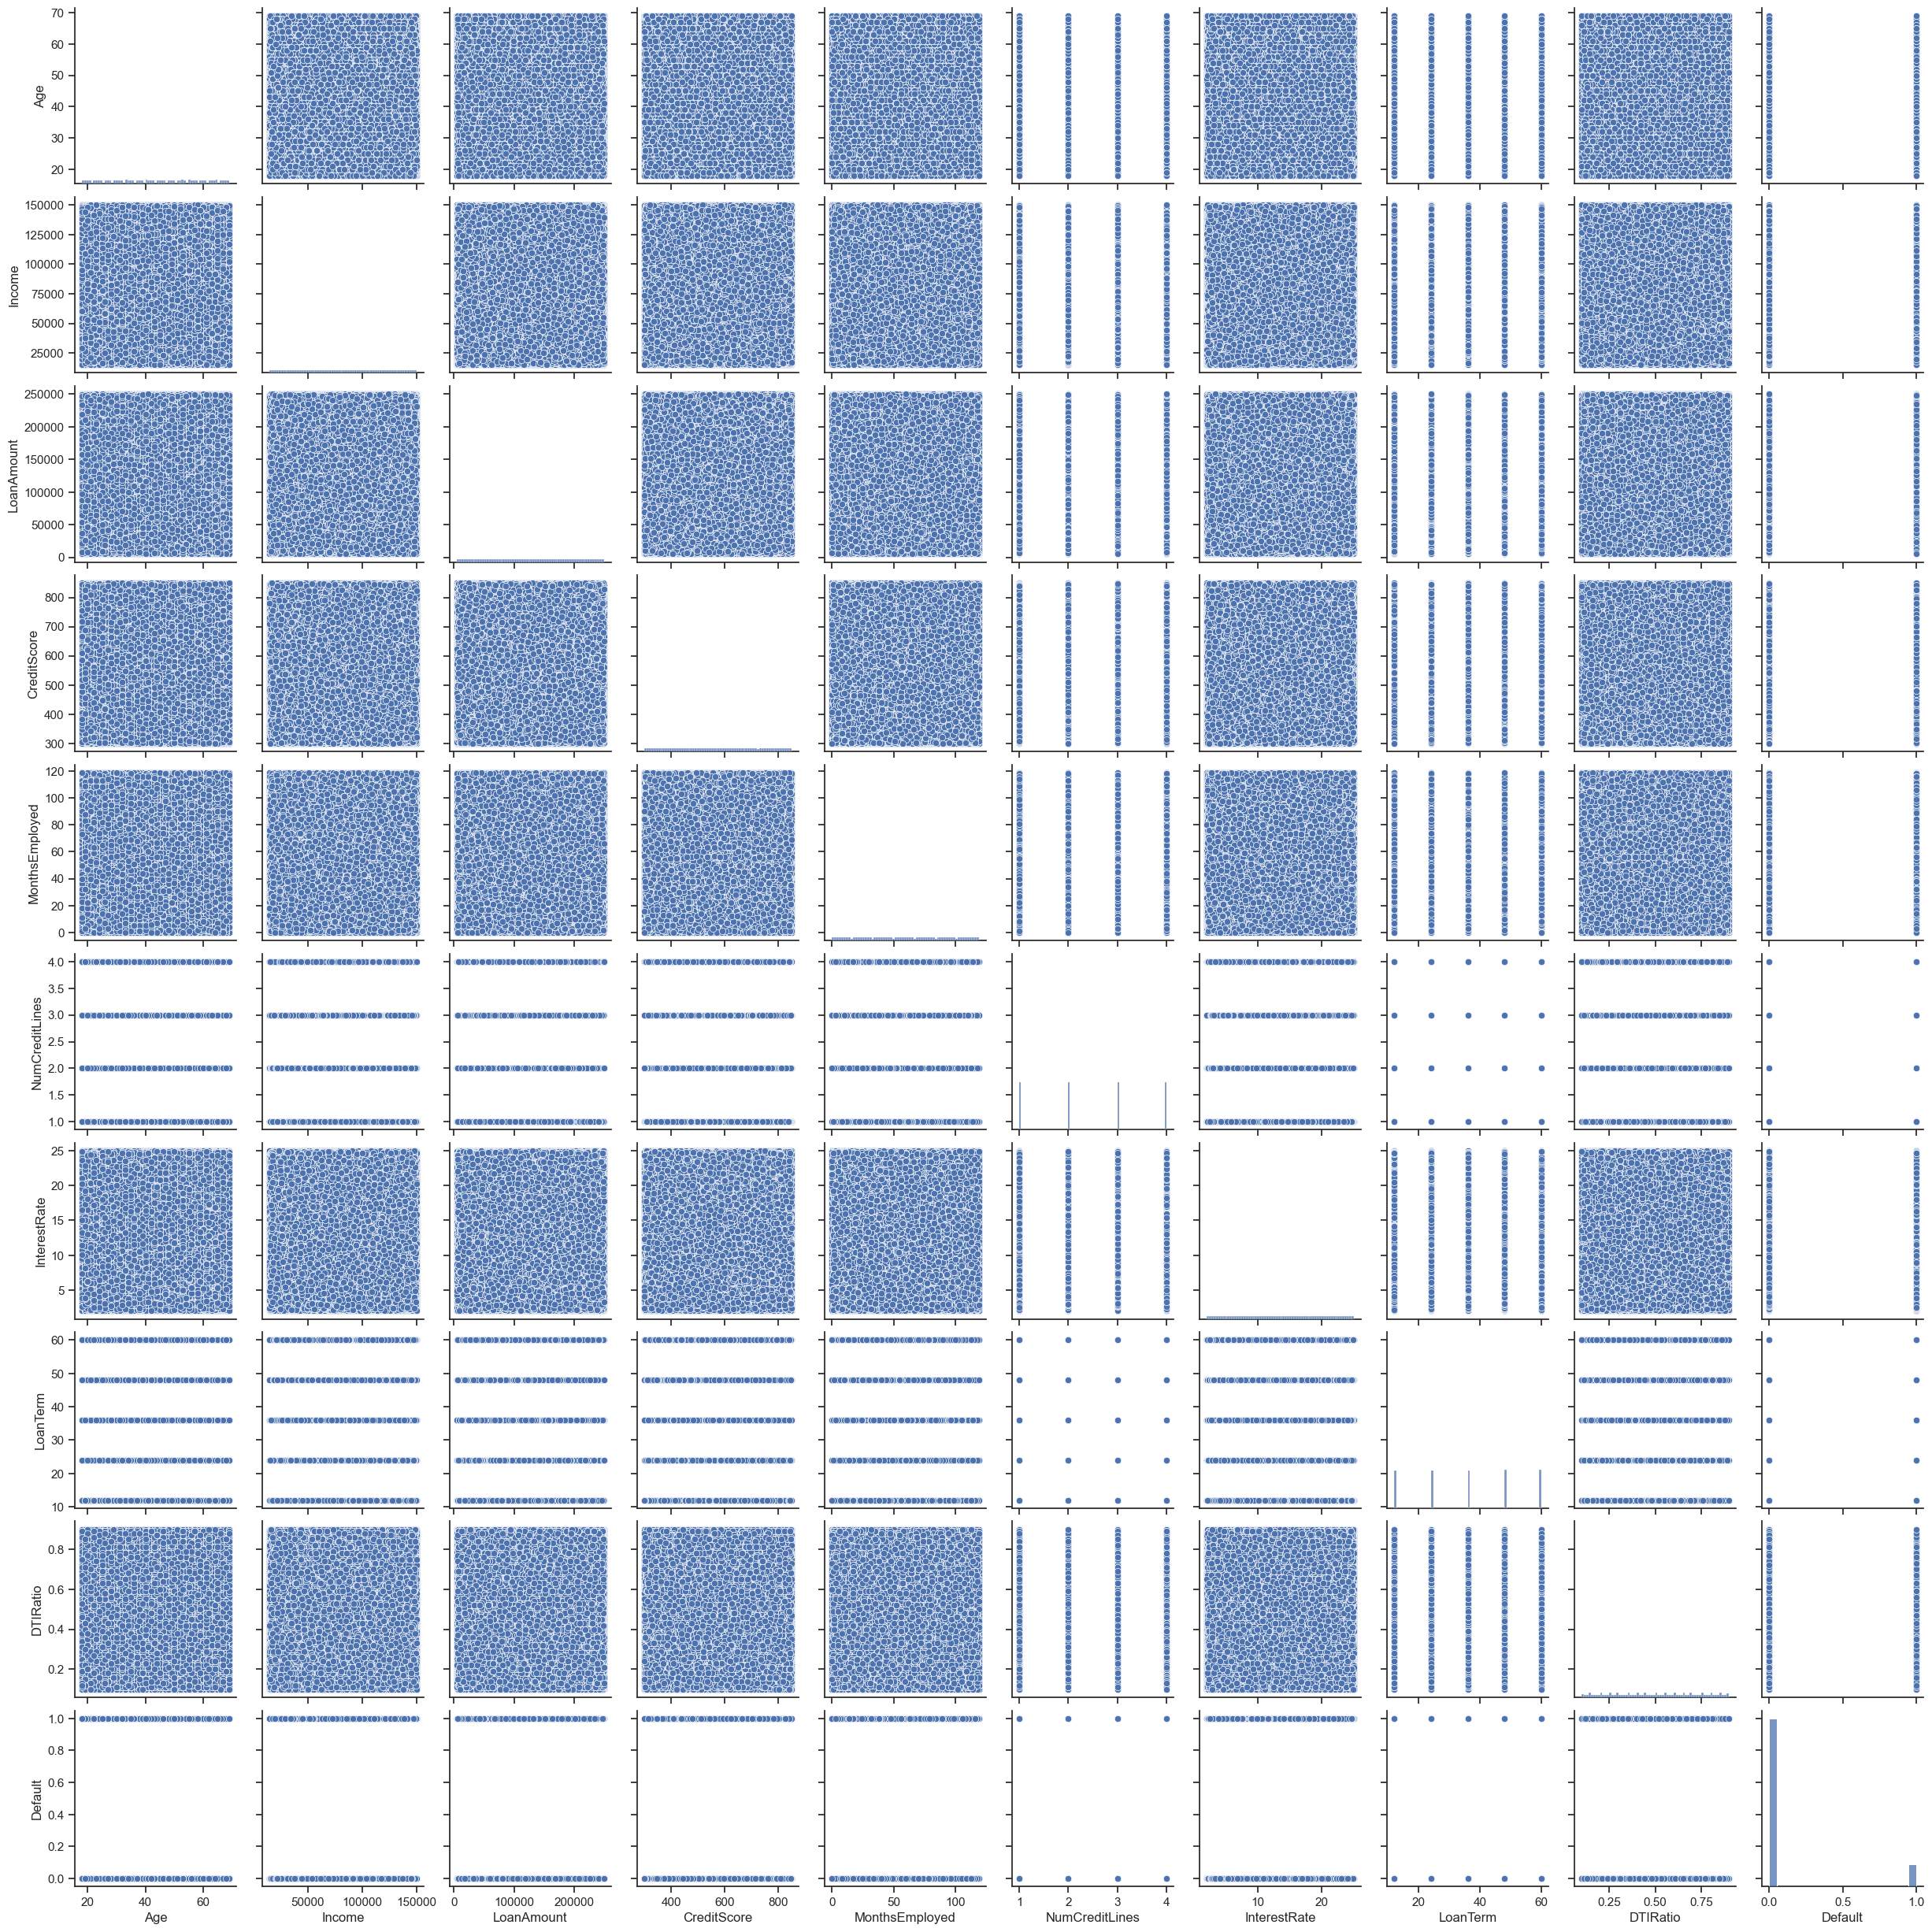

In [13]:
# Select numerical columns for scatter plots
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

# Create scatter plots for all pairs of numerical variables
sns.set(style="ticks")
sns.pairplot(dataset[numerical_columns])
plt.show()

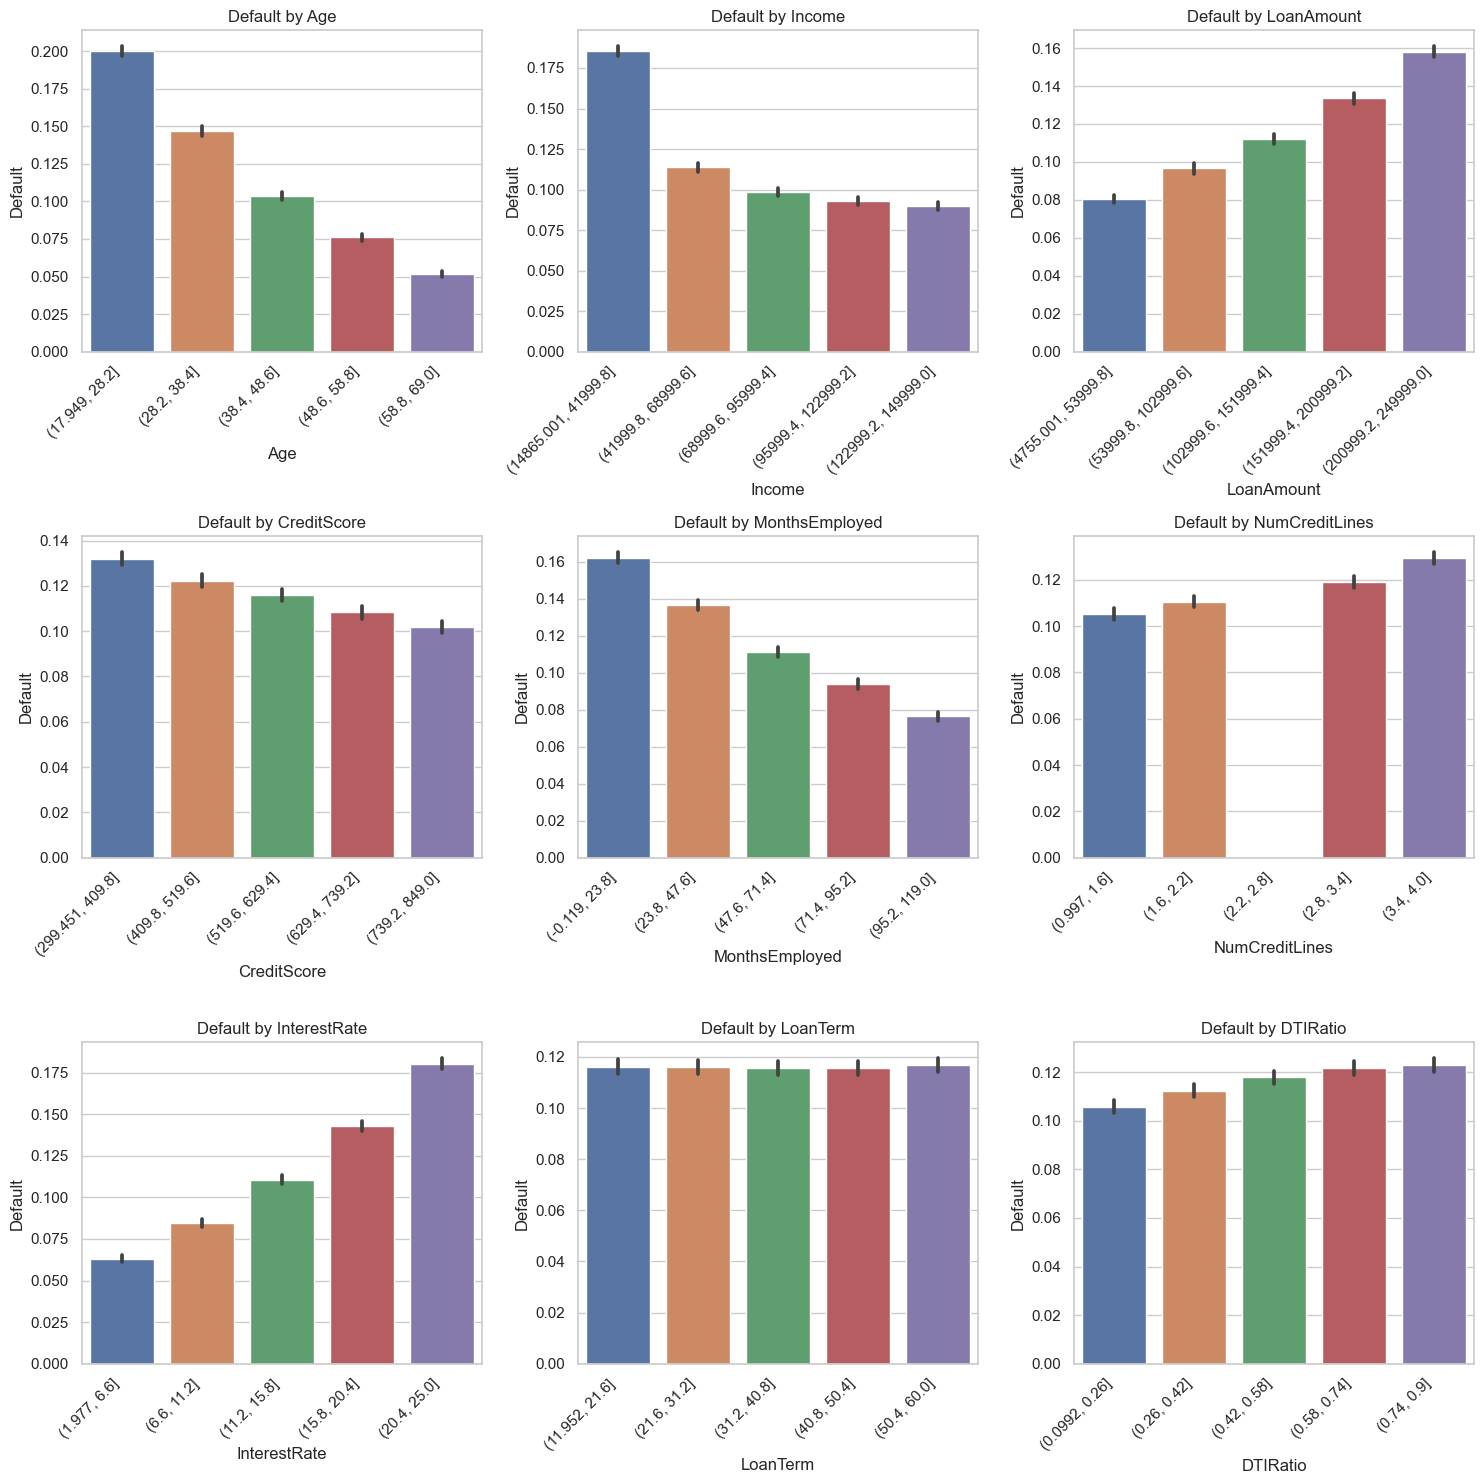

In [14]:
sns.set(style="whitegrid")  # Set style if needed

num_subplots = len(Numerical_features)
num_rows = (num_subplots + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# Flatten the axes to facilitate indexing
axes = axes.flatten()

# Loop through features and create bar plots
for i, feature in enumerate(Numerical_features):
    sns.barplot(x=pd.cut(dataset[feature], bins=5), y=dataset['Default'], ax=axes[i])
    axes[i].set_title(f'Default by {feature}')
    plt.sca(axes[i])
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


### Bivariate Analysis  <a id = 'Bivariate_Analysis'></a>

 **Visualize the correlation matrix of numerical columns in a dataset**

 #### Heat Map  <a id = 'Heatmap'></a>

In the next section, examine the correlations using the heatmap

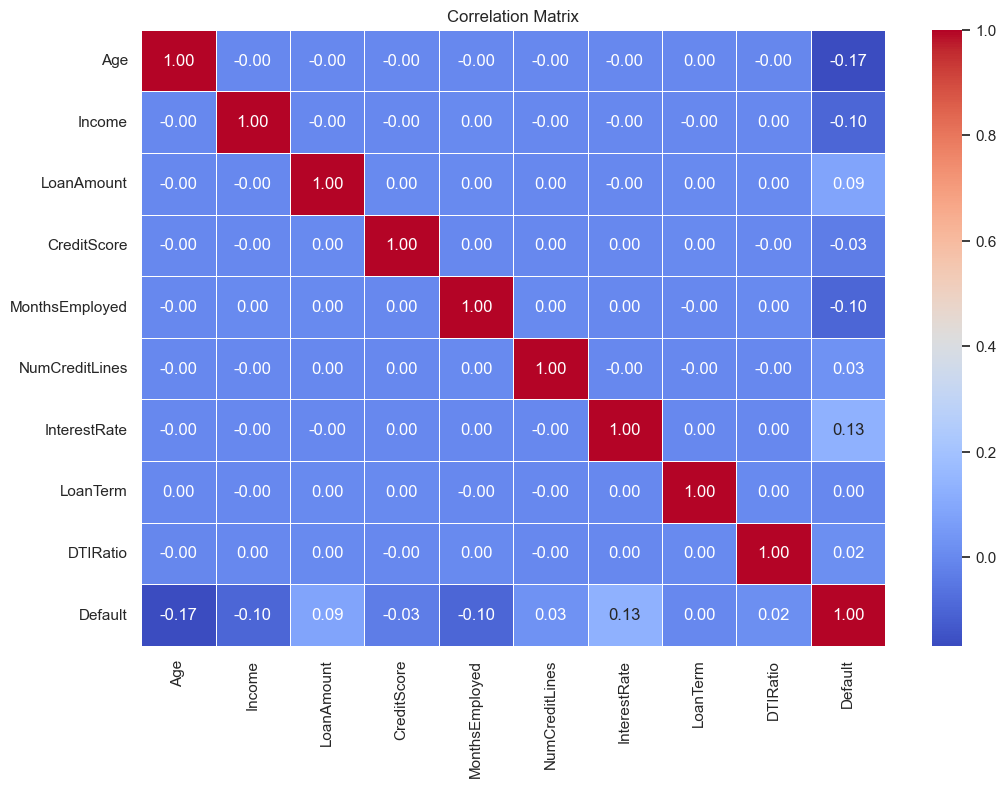

In [15]:
# Select all numerical columns for correlation analysis
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = dataset[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


##### Heatmap Summary

**Age and Default:**
There is a negative correlation of approximately -0.17 between Age and Default. This suggests that, on average, as the Age increases, the likelihood of Default decreases. However, the correlation is not very strong.

</br>**Income and Default:**
There is a negative correlation of approximately -0.10 between Income and Default. This indicates that, on average, higher income individuals may have a slightly lower likelihood of Default. Again, the correlation is not very strong.

</br>**LoanAmount and Default:**
There is a positive correlation of approximately 0.09 between LoanAmount and Default. This suggests that, on average, as the loan amount increases, the likelihood of Default also increases. However, the correlation is not very strong.

</br>**CreditScore and Default:**
There is a negative correlation of approximately -0.03 between CreditScore and Default. This implies that, on average, higher CreditScores are associated with a slightly lower likelihood of Default.

</br>**InterestRate and Default:**
There is a positive correlation of approximately 0.13 between InterestRate and Default. This indicates that, on average, higher interest rates are associated with a higher likelihood of Default.

</br>**MonthsEmployed and Default:**
There is a negative correlation of approximately -0.10 between MonthsEmployed and Default. This suggests that, on average, longer employment periods may be associated with a slightly lower likelihood of Default.</br>

</br>**Other Variables:**
The correlations involving NumCreditLines, LoanTerm, and DTIRatio with Default are relatively weak, with absolute values less than 0.05.

 #### Scatter Plots  <a id = 'Scatter_plots'></a>

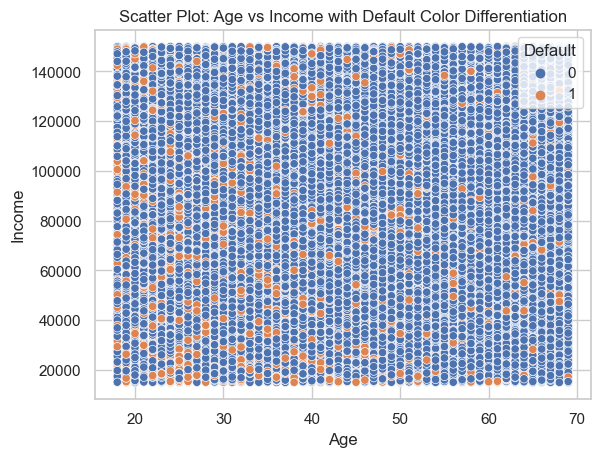

In [16]:
# Scatter plots with color differentiation for 'Default'
sns.scatterplot(data=dataset, x='Age', y='Income', hue='Default')
plt.title('Scatter Plot: Age vs Income with Default Color Differentiation')
plt.show()

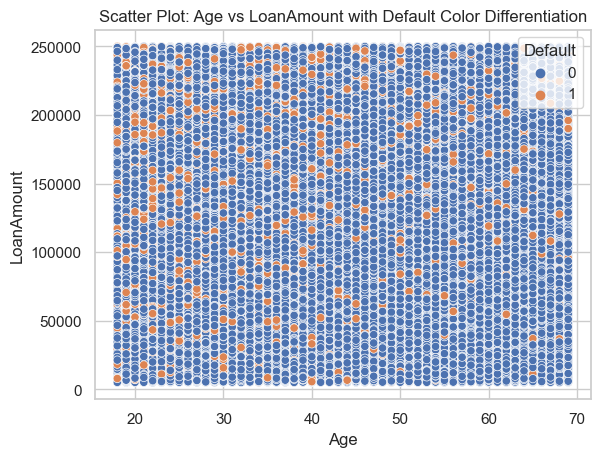

In [17]:
sns.scatterplot(data=dataset, x='Age', y='LoanAmount', hue='Default')
plt.title('Scatter Plot: Age vs LoanAmount with Default Color Differentiation')
plt.show()

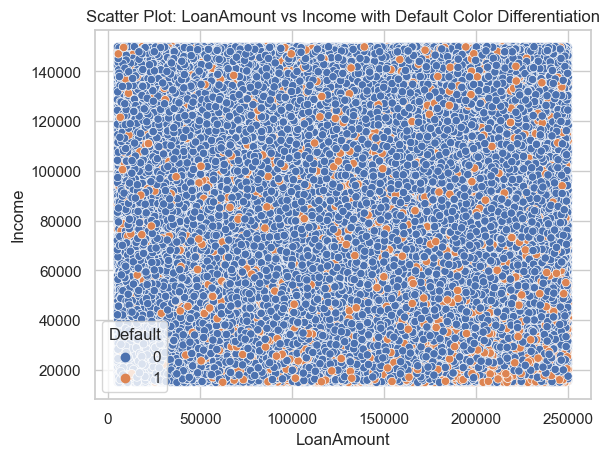

In [18]:
sns.scatterplot(data=dataset, x='LoanAmount', y='Income', hue='Default')
plt.title('Scatter Plot: LoanAmount vs Income with Default Color Differentiation')
plt.show()

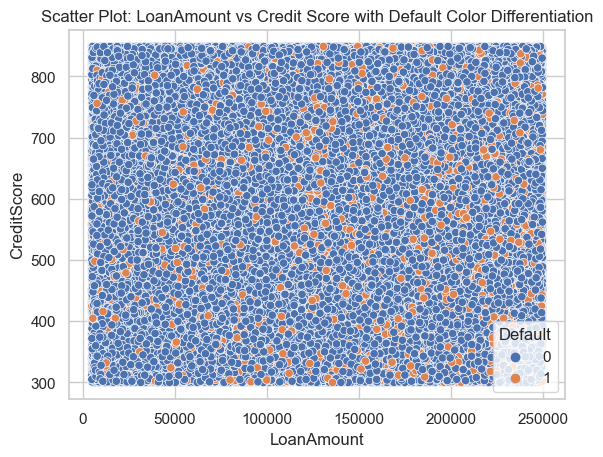

In [19]:
sns.scatterplot(data=dataset, x='LoanAmount', y='CreditScore', hue='Default')
plt.title('Scatter Plot: LoanAmount vs Credit Score with Default Color Differentiation')
plt.show()

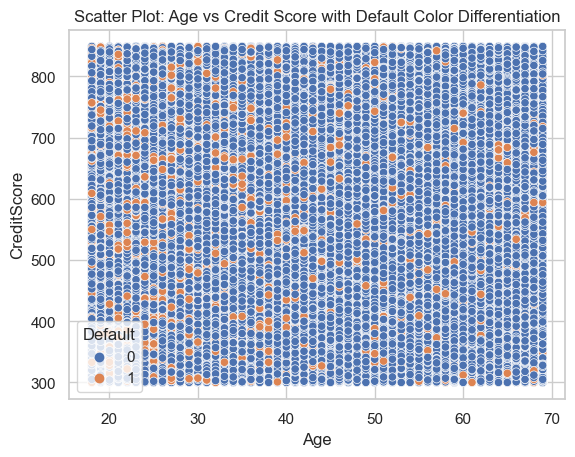

In [20]:
sns.scatterplot(data=dataset, x='Age', y='CreditScore', hue='Default')
plt.title('Scatter Plot: Age vs Credit Score with Default Color Differentiation')
plt.show()

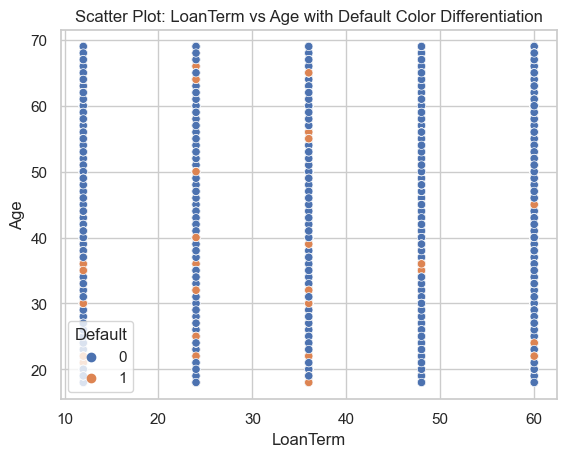

In [21]:
sns.scatterplot(data=dataset, x='LoanTerm', y='Age', hue='Default')
plt.title('Scatter Plot: LoanTerm vs Age with Default Color Differentiation')
plt.show()

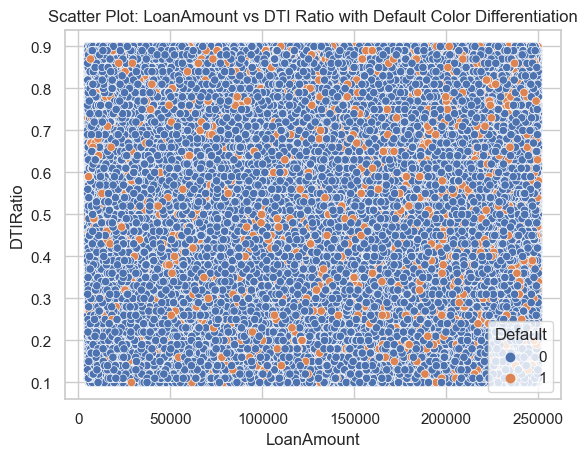

In [22]:
sns.scatterplot(data=dataset, x='LoanAmount', y='DTIRatio', hue='Default')
plt.title('Scatter Plot: LoanAmount vs DTI Ratio with Default Color Differentiation')
plt.show()

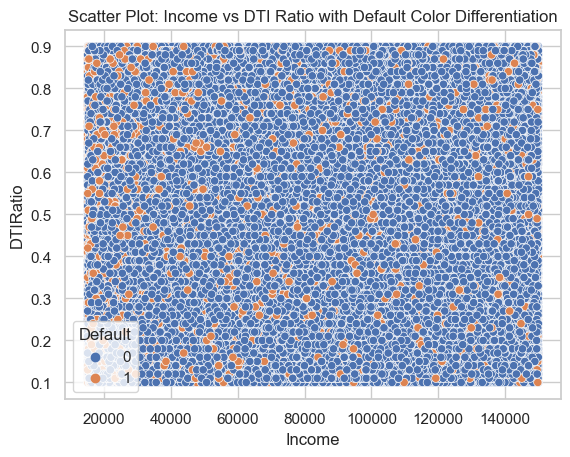

In [23]:
sns.scatterplot(data=dataset, x='Income', y='DTIRatio', hue='Default')
plt.title('Scatter Plot: Income vs DTI Ratio with Default Color Differentiation')
plt.show()

## Measure Relationship Strength  <a id = 'Measure_Relationship_Strength'></a>

### Categorical Features Relationships  <a id = 'Categorical_Relationships'></a>

Analyzing the correlation in categorical features is important for several reasons. Identifying associations is critical as it reveals whether the occurrence or value of one categorical variable is related to the occurrence or value of another.

Identifying correlation is also important for feature selection as highly correlated features may provide redundant information, and excluding some features can improve model interpretability and performance.


In [24]:
# Set the significance level
alpha = 0.05

# Loop through categorical features
for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(dataset['Default'], dataset[feature])

    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Output chi-square statistic and p-value
    print(f"\nChi-square test for {feature}:")
    print(f"Chi-square value: {chi2}")
    print(f"P-value: {p}")

    # Check for significance
    if p < alpha:
        print(f"There is a significant association between {feature} and Default.")
    else:
        print(f"There is no significant association between {feature} and Default.")


Chi-square test for Education:
Chi-square value: 214.01898255592707
P-value: 3.9404864175508156e-46
There is a significant association between Education and Default.

Chi-square test for EmploymentType:
Chi-square value: 529.7449284156027
P-value: 1.7066378020433154e-114
There is a significant association between EmploymentType and Default.

Chi-square test for LoanPurpose:
Chi-square value: 127.93422475687699
P-value: 1.0767865809403042e-26
There is a significant association between LoanPurpose and Default.

Chi-square test for MaritalStatus:
Chi-square value: 200.36113560654888
P-value: 3.105504830442399e-44
There is a significant association between MaritalStatus and Default.

Chi-square test for HasMortgage:
Chi-square value: 133.25200560751574
P-value: 7.963383224552868e-31
There is a significant association between HasMortgage and Default.

Chi-square test for HasCoSigner:
Chi-square value: 390.3050463714834
P-value: 7.103434211754059e-87
There is a significant association betwe

### Numerical Features Relationships  <a id = 'Numerical_Relationships'></a>

In [25]:
for feature in Numerical_features:
    corr, p_value = pearsonr(dataset[feature], dataset['Default'])
    print(f"Pearson Correlation between {feature} and Default: {corr}")
    print(f"P-value: {p_value}")

    # Check for significance
    alpha = 0.05
    if p_value < alpha:
        print(f"There is a significant association between {feature} and Default.")
    else:
        print(f"There is no significant association between {feature} and Default.")
    print(" ")


Pearson Correlation between Age and Default: -0.1677831648713431
P-value: 0.0
There is a significant association between Age and Default.
 
Pearson Correlation between Income and Default: -0.09911948445660468
P-value: 0.0
There is a significant association between Income and Default.
 
Pearson Correlation between LoanAmount and Default: 0.08665917723783713
P-value: 0.0
There is a significant association between LoanAmount and Default.
 
Pearson Correlation between CreditScore and Default: -0.034166493760770904
P-value: 7.92442171110111e-67
There is a significant association between CreditScore and Default.
 
Pearson Correlation between MonthsEmployed and Default: -0.09737382897016983
P-value: 0.0
There is a significant association between MonthsEmployed and Default.
 
Pearson Correlation between NumCreditLines and Default: 0.028329721809228707
P-value: 1.6808561555385693e-46
There is a significant association between NumCreditLines and Default.
 
Pearson Correlation between InterestRat

## EDA Summary  <a id = 'EDA_Summary'></a>

The EDA is a crucial step in preparing the dataset for machine learning models and gaining insights into the factors influencing the target variable.

**Dataset Overview:**
The dataset contains 255,347 entries and 18 columns.
The columns include features such as Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm, DTIRatio, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner, and the target variable Default.


**Summary Statistics:**
The summary statistics provide information about the count, unique values, top frequency, and frequency of the top value for categorical features (Education, EmploymentType, LoanPurpose, MaritalStatus, HasMortgage, HasCoSigner).

**Correlation Matrix:**
The correlation matrix explores the relationships between numerical features and the target variable Default.


Notable correlations:</br>
Age and Default have a negative correlation of approximately -0.17.</br>
Income and Default have a negative correlation of approximately -0.10.</br>
LoanAmount and Default have a positive correlation of approximately 0.09.</br>
InterestRate and Default have a positive correlation of approximately 0.13.</br>
Some correlations, like LoanTerm, have low absolute values, indicating weaker relationships.</br>


**Bivariate Analysis:**
Visualizations include scatter plots for numerical features, allowing observation of the relationships between features and Default.
Specific scatter plots visualize Age vs. Income, Age vs. LoanAmount, LoanAmount vs. Income, and others.


**Categorical Features Relationships:**
Chi-square tests are performed to analyze the association between categorical features (Education, EmploymentType, LoanPurpose, MaritalStatus, HasMortgage, HasCoSigner) and Default.
Significant associations are observed for all tested categorical features, indicating their relevance in predicting Default.


**Pearson Correlation and P-values for Numerical Features:**
Pearson correlations are calculated for numerical features against the target variable Default.
Significant associations (P-value < 0.05) are observed for features like LoanAmount, Income, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, and DTIRatio.


## Conclusion  <a id = 'Conclusion'></a>

The EDA provides a comprehensive understanding of the dataset, revealing relationships and associations between features and the target variable **Default**.

The identified correlations and associations can guide feature selection and inform the modeling process in predicting loan defaults.


As the final step, I examine the data struxture and save the updated 

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Age             255347 non-null  int64   
 1   Income          255347 non-null  int64   
 2   LoanAmount      255347 non-null  int64   
 3   CreditScore     255347 non-null  int64   
 4   MonthsEmployed  255347 non-null  int64   
 5   NumCreditLines  255347 non-null  int64   
 6   InterestRate    255347 non-null  float64 
 7   LoanTerm        255347 non-null  int64   
 8   DTIRatio        255347 non-null  float64 
 9   Education       255347 non-null  category
 10  EmploymentType  255347 non-null  category
 11  MaritalStatus   255347 non-null  category
 12  HasMortgage     255347 non-null  category
 13  HasDependents   255347 non-null  object  
 14  LoanPurpose     255347 non-null  category
 15  HasCoSigner     255347 non-null  category
 16  Default         255347 non-null  int64

In [27]:
dataset.to_csv('ModelReady_LoanDefault.csv', index=False)